# open_mfdataset
Figuring this out to save space and time combining all files into monsters.

In [2]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    polyfit, ccrs, LinearRegression, metrics
    )

from functions import (
    masked_average, interpretNS, plot_slf_isotherms, 
    add_weights, process_caliop, process_for_slf,
    noresm_slf_to_df, regress_1d
    )

from classes import CT_SLF_Metric

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'mnth15runs/'   # inconsistent label compared to jupy_test
mods_dir = 'inp_validation/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(mods_dir) and os.path.exists(output_dir) and os.path.exists(mods_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


In [5]:
os.listdir(case_dir)

['20200319_132512_singleparam_cam61arctic2m15_wbf_1_inp_1',
 '20200219_120417_singleparam_cam61_wbf_0.1_inp_1',
 '20200112_002538_singleparam_nudge_wbf_1_inp_0',
 '20200116_130416_nudged_wbfmods_wbf_10_inp_1',
 '20200327_125556_singleparam_cam61_arctic2_wbf_0.1_inp_0.05',
 '20200327_170021_singleparam_noresm2tests_wbf_0.05_inp_1',
 '20191230_130025_singleparam_cttest15_wbf_1_inp_1',
 '20191217_145440_singleparam_jolt_wbf_1_inp_1000',
 '20200110_142006_singleparam_nudge_wbf_1_inp_1000',
 '20191128_171713_sampleparamset_wbf_10_inp_1',
 '20200323_135834_singleparam_cam61_arctic2_wbf_0.1_inp_0.01',
 '20200225_182100_singleparam_cam61_wbf_0.01_inp_0.01',
 '20191209_180424_sampleparamset_wbf_1_inp_0.1',
 'N1850OCBDRD_f09_tn14',
 'error_vs_iso.png',
 '20200323_170403_singleparam_cam6_fit_wbf_0.3_inp_100',
 '.ipynb_checkpoints',
 '20200219_120417_singleparam_cam61_wbf_1_inp_0.1',
 '20200220_105217_singleparam_cam61_wbf_0.01_inp_1',
 '20200218_172625_singleparam_cam61_wbf_1_inp_1',
 'unused',
 

In [45]:
os.chdir("%s%s/atm/hist/" % (case_dir, "20200327_125556_singleparam_cam61_arctic2_wbf_0.3_inp_0.01"))

In [53]:
allfiles = os.listdir()
h0files = [i for i in allfiles if "h0" in i]
pathstr =
gooffiles = ['%s%s/atm/hist/' + i for i in allfiles if "h0" in i] % ('hi', 'ho')

h0files
gooffiles

TypeError: unsupported operand type(s) for %: 'list' and 'tuple'

In [40]:
bob = xr.open_mfdataset(h0files, combine='by_coords')

[autoreload of classes failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/classes.py", line

FileNotFoundError: [Errno 2] No such file or directory: b'/mnt/mcc-ns9600k/jonahks/20200327_125556_singleparam_cam61_arctic2_wbf_0.3_inp_0.01.cam.h0.2010-01.nc'

In [38]:
os.listdir(case_dir)

['20200319_132512_singleparam_cam61arctic2m15_wbf_1_inp_1',
 '20200219_120417_singleparam_cam61_wbf_0.1_inp_1',
 '20200112_002538_singleparam_nudge_wbf_1_inp_0',
 '20200116_130416_nudged_wbfmods_wbf_10_inp_1',
 '20200327_125556_singleparam_cam61_arctic2_wbf_0.1_inp_0.05',
 '20200327_170021_singleparam_noresm2tests_wbf_0.05_inp_1',
 '20191230_130025_singleparam_cttest15_wbf_1_inp_1',
 '20191217_145440_singleparam_jolt_wbf_1_inp_1000',
 '20200110_142006_singleparam_nudge_wbf_1_inp_1000',
 '20191128_171713_sampleparamset_wbf_10_inp_1',
 '20200323_135834_singleparam_cam61_arctic2_wbf_0.1_inp_0.01',
 '20200225_182100_singleparam_cam61_wbf_0.01_inp_0.01',
 '20191209_180424_sampleparamset_wbf_1_inp_0.1',
 'N1850OCBDRD_f09_tn14',
 'error_vs_iso.png',
 '20200323_170403_singleparam_cam6_fit_wbf_0.3_inp_100',
 '.ipynb_checkpoints',
 '20200219_120417_singleparam_cam61_wbf_1_inp_0.1',
 '20200220_105217_singleparam_cam61_wbf_0.01_inp_1',
 '20200218_172625_singleparam_cam61_wbf_1_inp_1',
 'unused',
 

In [55]:
testmetric = CT_SLF_Metric(case_dir)

In [63]:
testmetric.add_case('20200319_132512_singleparam_cam61arctic2m15_wbf_1_inp_1')

/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/classes.py:601: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  _ds = xr.open_mfdataset(self.files) #, combine='by_coords')
/opt/conda/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


/opt/conda/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return f

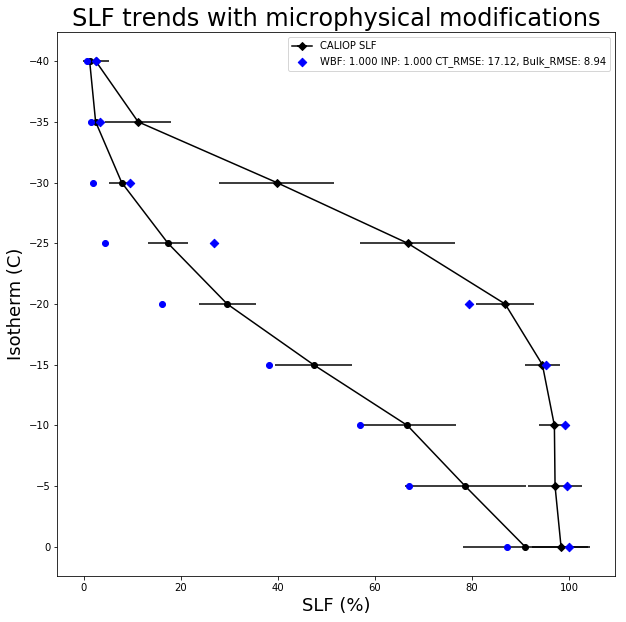

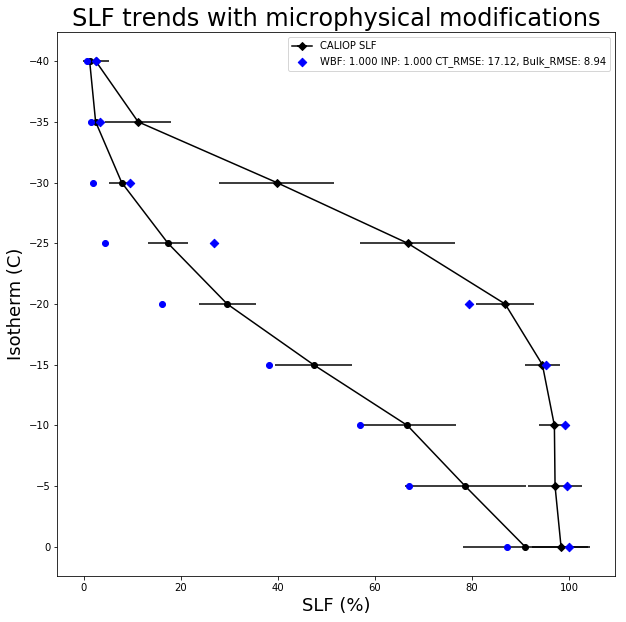

In [78]:
testmetric.plot_isos_all()

In [66]:
og = testmetric.get_cases()

In [69]:
for i in og:
    case = og[i]

In [75]:
ds = case.case_da

In [77]:
ds['CT_SLF_TAVG']

<xarray.DataArray 'CT_SLF_TAVG' (isotherms_mpc: 9, lat: 96, lon: 144)>
dask.array<mean_agg-aggregate, shape=(9, 96, 144), dtype=float32, chunksize=(9, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * isotherms_mpc  (isotherms_mpc) float64 233.1 238.1 243.1 ... 268.1 273.1

In [65]:
case = testmetric.get_case(og)

Could not find None in the SLF_Metric object
